In [98]:
import numpy as np # type: ignore
import random # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [74]:
games = pd.read_csv("games.csv")

games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23


In [75]:
print(games.describe())

             gameId  season        week  homeFinalScore  visitorFinalScore
count  1.360000e+02   136.0  136.000000      136.000000         136.000000
mean   2.022099e+09  2022.0    4.845588       22.669118          20.948529
std    5.996614e+03     0.0    2.567254        8.659874           9.731446
min    2.022091e+09  2022.0    1.000000        3.000000           0.000000
25%    2.022093e+09  2022.0    3.000000       17.000000          14.750000
50%    2.022101e+09  2022.0    5.000000       22.500000          20.000000
75%    2.022102e+09  2022.0    7.000000       27.000000          27.000000
max    2.022111e+09  2022.0    9.000000       49.000000          48.000000


In [76]:
games_by_home = games.groupby(["homeTeamAbbr"]).value_counts()
print(games_by_home)

homeTeamAbbr  gameId      season  week  gameDate    gameTimeEastern  visitorTeamAbbr  homeFinalScore  visitorFinalScore
ARI           2022091110  2022    1     9/11/2022   16:25:00         KC               21              44                   1
              2022092510  2022    3     9/25/2022   16:25:00         LA               12              20                   1
              2022100911  2022    5     10/9/2022   16:25:00         PHI              17              20                   1
              2022102000  2022    7     10/20/2022  20:15:00         NO               42              34                   1
              2022110608  2022    9     11/6/2022   16:05:00         SEA              21              31                   1
                                                                                                                          ..
WAS           2022091109  2022    1     9/11/2022   13:00:00         JAX              28              22                   1
     

In [77]:
games_home = games[["homeTeamAbbr", "homeFinalScore"]]

games_vis = games[["visitorTeamAbbr", "visitorFinalScore"]]

print(games_home, '\n' ,games_vis)


    homeTeamAbbr  homeFinalScore
0             LA              10
1            ATL              26
2            CAR              24
3            CHI              19
4            CIN              20
..           ...             ...
131          WAS              17
132          ARI              21
133           TB              16
134           KC              20
135           NO              13

[136 rows x 2 columns] 
     visitorTeamAbbr  visitorFinalScore
0               BUF                 31
1                NO                 27
2               CLE                 26
3                SF                 10
4               PIT                 23
..              ...                ...
131             MIN                 20
132             SEA                 31
133              LA                 13
134             TEN                 17
135             BAL                 27

[136 rows x 2 columns]


In [78]:
games_diff = games_home["homeFinalScore"] - games_vis["visitorFinalScore"]
games_won_home = np.count_nonzero(games_diff > 0)
print(games_won_home)
games_won_home_prop = games_won_home/games_diff.shape[0]

print(games_won_home_prop)

73
0.5367647058823529


In [100]:
def simulation():
    prop = np.random.binomial(100, .5, 1)
    return float(sum(prop) /100)
simulation()

0.53

[0.5  0.47 0.56 ... 0.53 0.56 0.57]


0.2515

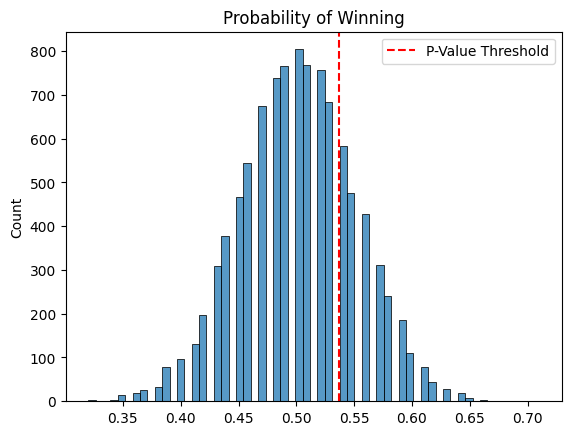

In [106]:
repititions = 10000

sim = []
for i in np.arange(repititions):
    sim = np.append(sim, simulation())

sns.histplot(sim)
plt.axvline(x=games_won_home_prop, color="red", linestyle= "--", label="P-Value Threshold")
plt.legend()
plt.title("Probability of Winning")
print(sim)
p_value = np.count_nonzero(sim >= games_won_home_prop)/10000
p_value

With a p-value of above .2 we cannot conclude that NFL teams that play at home are more likely to win than playing away.